
<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

## 🧠 Introducción a redes neuronales feedforward con SKLEARN y TensorFlow/Keras


## ✅ ¿Qué es una red neuronal feedforward?

Una **red neuronal feedforward** (también llamada MLP o perceptrón multicapa) es un tipo de red donde los datos fluyen en una sola dirección: desde la capa de entrada, a través de una o más capas ocultas, hasta la salida. Es uno de los modelos fundamentales en el aprendizaje profundo.

---

## SkLearn

## 🧠 ¿Qué es `MLPClassifier`?

`MLPClassifier` es una clase del módulo `sklearn.neural_network` que permite construir **redes neuronales artificiales supervisadas** para problemas de clasificación. Implementa una **red neuronal feedforward** con una o más capas ocultas y entrenamiento mediante **retropropagación (backpropagation)**.

---

##  Sintaxis básica

```python
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200)
```

---

## Parámetros más importantes

| Parámetro            | Descripción                                                                                                                                                                                                            |
| -------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `hidden_layer_sizes` | Tupla que define la arquitectura de la red. Por ejemplo, `(100,)` crea una red con una capa oculta de 100 neuronas. `(50, 30)` crea dos capas ocultas: la primera con 50 y la segunda con 30 neuronas.                 |
| `activation`         | Función de activación de las capas ocultas. Valores posibles:<ul><li>`'relu'` (por defecto): ReLU</li><li>`'tanh'`: tangente hiperbólica</li><li>`'logistic'`: sigmoide</li></ul>                                      |
| `solver`             | Algoritmo de optimización:<ul><li>`'adam'` (por defecto): recomendado para datasets grandes</li><li>`'sgd'`: descenso del gradiente estocástico</li><li>`'lbfgs'`: más rápido en conjuntos de datos pequeños</li></ul> |
| `max_iter`           | Número máximo de iteraciones (épocas) para entrenar el modelo.                                                                                                                                                         |
| `alpha`              | Término de regularización L2 (evita sobreajuste). Valor por defecto: `0.0001`.                                                                                                                                         |
| `learning_rate`      | Esquema para actualizar la tasa de aprendizaje:<ul><li>`'constant'`</li><li>`'invscaling'`</li><li>`'adaptive'`</li></ul>                                                                                              |
| `learning_rate_init` | Tasa de aprendizaje inicial. Por defecto: `0.001`.                                                                                                                                                                     |
| `early_stopping`     | Si es `True`, detiene el entrenamiento cuando el rendimiento no mejora en un conjunto de validación.                                                                                                                   |
| `random_state`       | Fija la semilla para reproducibilidad.                                                                                                                                                                                 |

---

En el clasificador **MLPClassifier** de **scikit-learn**, **no es necesario especificar la capa de salida** porque esta se **define automáticamente en función del tipo de problema y del número de clases en los datos de entrenamiento**. 

* El número de neuronas en la capa de salida se **determina por el número de clases** en el conjunto de datos.

  * Ejemplo: si estás clasificando entre 3 clases, la capa de salida tendrá 3 neuronas.
* Esto lo infiere automáticamente el modelo al ver las etiquetas (`y`) cuando se entrena (`fit`).

### **Función de activación de la capa de salida**

* La **función de activación de la capa de salida también está predeterminada según el problema**:

  * Para **clasificación multiclase**, se utiliza **softmax** (aunque internamente puede usar *logistic regression multinomial*).
  * Para **clasificación binaria**, se utiliza **logística (sigmoid)**.
* Esto depende del parámetro `solver` y el tipo de salida (`y`) proporcionado.

### **El usuario especifica solo las capas ocultas**

* El parámetro `hidden_layer_sizes` permite indicar solo las **capas ocultas** y su estructura (número de capas y neuronas por capa).
* La capa de entrada se define según el número de características (`X.shape[1]`), y la de salida según las clases de `y`.

---

### Ejemplo:

```python
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu')
mlp.fit(X_train, y_train)
```

* **Entrada:** definida por `X_train.shape[1]`
* **Ocultas:** dos capas, una con 100 y otra con 50 neuronas
* **Salida:** inferida automáticamente por `y_train`

---

## Entrenamiento y predicción

```python
mlp.fit(X_train, y_train)       # Entrena la red
y_pred = mlp.predict(X_test)    # Predice clases
y_proba = mlp.predict_proba(X_test)  # Probabilidades (para ROC, etc.)
```

---

## Evaluación del modelo

```python
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
```



# Ejemplo usando diabetes db

In [119]:
import numpy as np
import matplotlib.pyplot       as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

In [133]:
from sklearn.datasets import fetch_openml
import pandas as pd
# Cargar el dataset, separar etiquetas y datos de entrada
# Particionar en entrenamiento y prueba
diabetes_data = fetch_openml(name='diabetes', version=1, as_frame=True)
df = diabetes_data.frame

X = df.drop(columns='class')
y = (df['class'] == 'tested_positive').astype(int)  # Convertir etiquetas a 0 y 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Crear y entrenar el modelo MLPClassifier

In [134]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10,5,),  # capas ocultas
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42,
    batch_size=100
)

mlp.fit(X_train_scaled, y_train)

# 4. Evaluar el modelo
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7077922077922078

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       100
           1       0.58      0.59      0.59        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



## Calcular ROC

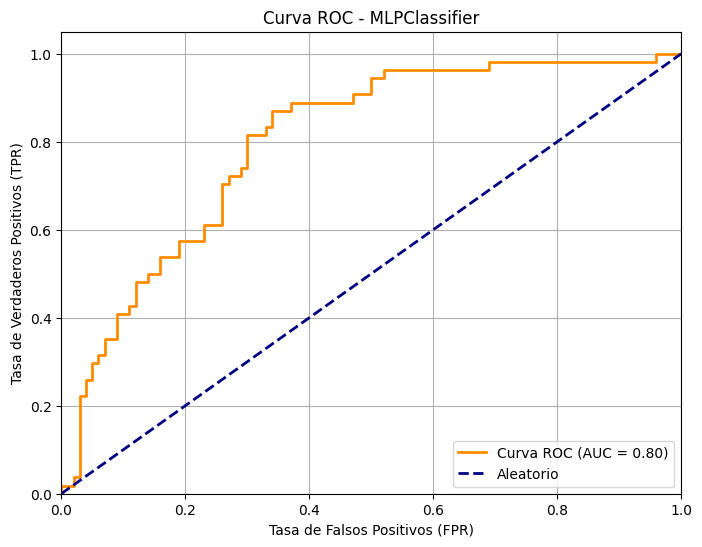

In [135]:
#Obtener las probabilidades estimadas para la clase positiva
y_proba = mlp.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de clase 1

#Calcular los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
#Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - MLPClassifier')
plt.legend(loc="lower right")
plt.grid(True)

## Construir red neuronal con TensorFlow

### PRIMERO DEBES INSTALAR TENSORFLOW

```
pip install tensorflow
```

### ¿Qué es TensorFlow?

**TensorFlow** es una biblioteca de código abierto desarrollada por Google para el aprendizaje automático y la computación numérica. A través de su interfaz de alto nivel **Keras**, permite construir y entrenar modelos de redes neuronales de forma simple y eficiente.

---


## 🔧 ¿Por qué usar Keras?

Keras (incluido en TensorFlow) proporciona una forma intuitiva de construir modelos. Hay dos formas principales:

* **`Sequential`**: para modelos lineales capa por capa.
* **`Functional`**: para modelos con múltiples entradas, salidas o estructuras más complejas.

---

## 📦 Pasos típicos para construir un modelo con Keras

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# 1. Definir la arquitectura
model = Sequential([
    Input(shape=(n_features,)),       # Entrada con n características
    Dense(10, activation='relu'),     # Capa oculta 1
    Dense(5, activation='relu'),      # Capa oculta 2
    Dense(1, activation='sigmoid')    # Capa de salida para clasificación binaria
])

# 2. Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
```

---

## 🔍 Componentes

| Componente                   | Descripción                                                                            |
| ---------------------------- | -------------------------------------------------------------------------------------- |
| `Input(shape=(n,))`          | Define el tamaño de las entradas del modelo (n características)                        |
| `Dense(units, activation)`   | Capa completamente conectada. `units` = neuronas, `activation` = función de activación |
| `activation='relu'`          | Función de activación ReLU (popular en capas ocultas)                                  |
| `activation='sigmoid'`       | Para salida binaria, convierte la salida en una probabilidad                           |
| `loss='binary_crossentropy'` | Función de pérdida para clasificación binaria                                          |
| `optimizer='adam'`           | Algoritmo eficiente para ajustar pesos                                                 |
| `metrics=['accuracy']`       | Métrica para evaluar desempeño en clasificación                                        |

---

A diferencia de **scikit-learn**, donde el `MLPClassifier` infiere automáticamente la **capa de salida** a partir de las etiquetas del conjunto de entrenamiento (`y`), en **TensorFlow/Keras** **sí es necesario definir explícitamente la capa de salida** en el modelo.

### En TensorFlow/Keras:

* **Debes agregar manualmente la capa de salida** en la arquitectura del modelo.
* Debes especificar:

  * El **número de neuronas** en la capa de salida (según el número de clases).
  * La **función de activación** adecuada:

    * `sigmoid` para **clasificación binaria**.
    * `softmax` para **clasificación multiclase**.



* **scikit-learn (`MLPClassifier`)**: Capa de salida **automática**.
* **TensorFlow/Keras**: Capa de salida **debe definirse manualmente**, lo que ofrece **mayor control y flexibilidad**.

-----

## 📈 Evaluar el modelo

```python
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
```

---

## 🧪 Recomendaciones

* **Escalar** los datos con `StandardScaler` antes de entrenar redes neuronales.
* Puedes usar métricas adicionales como `AUC`, `Precision`, `Recall`, etc.
* Para visualización de desempeño, es útil graficar **curvas ROC** o el **historial de entrenamiento** (`history.history`).

---

## 📊 Ejemplo de visualización del entrenamiento

```python
import matplotlib.pyplot as plt

history = model.fit(...)  # como antes

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.grid()
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.show()
```


In [91]:
#multilayer feedforward
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

# Ejemplo usando diabetes db

In [136]:
num_classes = 2
h1 = 10
h2 = 5
h3 = 1

#  Definir el modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Número de características (8)
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria
])

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [141]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc')])

#Entrenar el modelo
print("[INFO] entrenando.......")
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=0)
print("[INFO] FIN!!")

# Evaluar en el conjunto de prueba
loss, acc, auc_tf = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f} | Test AUC: {auc_tf:.4f}")


[INFO] entrenando.......
[INFO] FIN!!
Test Accuracy: 0.7078 | Test AUC: 0.7645


In [ ]:
predictions = model.predict(X_test_scaled)
predictions[:10]

### Calcular los valores de la curva ROC

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


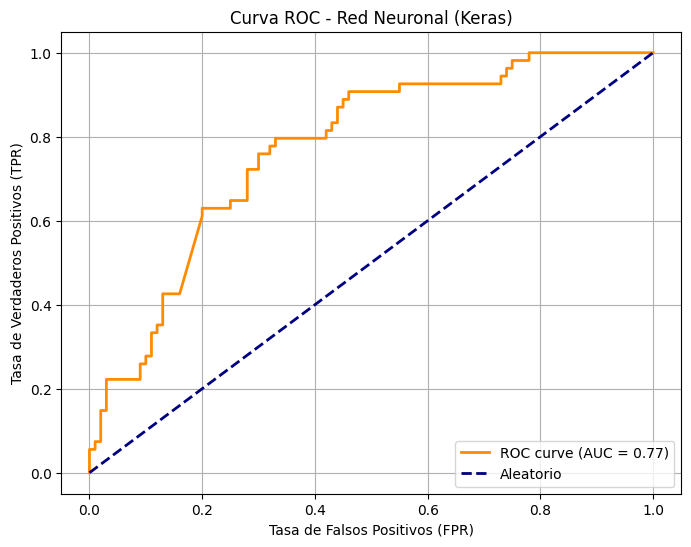

In [143]:
y_proba = model.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Red Neuronal (Keras)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Probar con MNIST



10 primeras imagenes de prueba


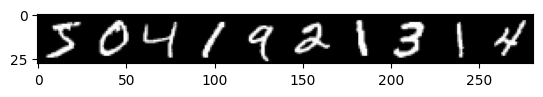

In [149]:
mnist = fetch_openml('mnist_784',parser='auto')
X = mnist.data / 255.0  # Normalize pixel values to 0-1 range
y = mnist.target.astype(int)

images =  np.zeros((28,1))
for i in range(10):
    image =np.array(X.iloc[i]).reshape((28,28))
    images=np.append(images,image,axis=1)
print("\n\n10 primeras imagenes de prueba")    
plt.imshow(images,cmap="gray"); 

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [151]:
labels,count_class = np.unique(y_train,return_counts=True)

print('[INFO] \nlabels: \n %s \ncount per class \n %s' % (labels,count_class))
print('Training set dimensions: %s x %s' % (X_train.shape[0],X_train.shape[1]))
print('Test set dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))


[INFO] 
labels: 
 [0 1 2 3 4 5 6 7 8 9] 
count per class 
 [5522 6302 5592 5713 5459 5050 5501 5834 5460 5567]
Training set dimensions: 56000 x 784
Test set dimensions: 14000 x 784


In [152]:
num_classes = labels.size
#  Definir el modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Número de características (8)
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(num_classes, activation='sigmoid')  # Salida binaria
])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,965 (31.11 KB)

 Trainable params: 7,965 (31.11 KB)

 Non-trainable params: 0 (0.00 B)

# One-hot encoding

In [161]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)

print('convertir: ',y_train.iloc[0],' a one hot encoding : ',train_labels[0])

convertir:  0  a one hot encoding :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [163]:
#'categorical_crossentropy'
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, train_labels, epochs=10, batch_size=10,verbose=3)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


# Evaluar en el conjunto de prueba


In [167]:
predictions = model.predict(X_test)
predIdxs = np.argmax(predictions, axis=1)
predIdxs[:10]

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([7, 3, 1, 1, 2, 5, 9, 3, 8, 1], dtype=int64)



10 primeras imagenes de prueba


array([7, 3, 1, 1, 2, 5, 9, 3, 8, 1], dtype=int64)

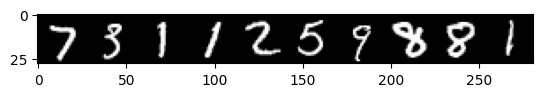

In [170]:
images =  np.zeros((28,1))
for i in range(10):
    image =np.array(X_test.iloc[i]).reshape((28,28))
    images=np.append(images,image,axis=1)
print("\n\n10 primeras imagenes de prueba")    
plt.imshow(images,cmap="gray"); 
predIdxs[:10]

In [171]:
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9247 - loss: 0.2751
Accuracy: 92.59
